In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('preprocessing_year.csv', encoding='cp949')
data.head()

,Unnamed: 0,전출지별,전입지별,2017_x,2018_x,2019_x,2020_x,2021_x,거리,전입지 면적,2017_y,2018_y,2019_y,2020_y,2021_y,2017,2018,2019,2020,2021
0,0,부산광역시,서울특별시,19460,19737,20285,20990,20009,282.825019,6.052440e+08,9857426,9765623,9729107,9668465,9509458,3470653,3441453,3413841,3391946,3350380
1,1,부산광역시,대구광역시,4506,4505,4220,4674,4720,72.912774,8.836982e+08,2475231,2461769,2438031,2418346,2385412,3470653,3441453,3413841,3391946,3350380
2,2,부산광역시,인천광역시,2994,2902,3055,2980,2758,308.289734,1.066465e+09,2948542,2954642,2957026,2942828,2948375,3470653,3441453,3413841,3391946,3350380
3,3,부산광역시,광주광역시,1073,1011,992,1142,1139,243.805183,5.011132e+08,1463770,1459336,1456468,1450062,1441611,3470653,3441453,3413841,3391946,3350380
4,4,부산광역시,대전광역시,2159,2180,2172,2144,2124,202.438173,5.395036e+08,1502227,1489936,1474870,1463882,1452251,3470653,3441453,3413841,3391946,3350380


In [83]:
alpha = 0.869125366


beta = 0.679855347  


gamma = 9.666992188 


sig = 0.166656494


lamb_list = np.linspace(-0.05,0.2,200)

In [84]:
err_list=[]
for lamb in lamb_list:
    tem = 1
    tem *= np.exp(sig)
    tem *= (data['2017']**alpha)
    tem *= (data['2017_y']**beta) 
    tem /= (data['거리']**gamma) 
    tem *= np.exp(lamb * data['2017_y'] / data['전입지 면적'] * data['거리'])
    
    tem_err = sum((np.log(data['2017_x']/tem))**2)
    err_list.append(tem_err)


In [85]:
tem = 1
tem *= np.exp(sig)
tem *= (data['2017']**alpha)
tem *= (data['2017_y']**beta) 
tem /= (data['거리']**gamma) 
tem *= np.exp(-0.00672824 * data['2017_y'] / data['전입지 면적'] * data['거리'])
tem_err = sum((np.log(data['2017_x']/tem))**2)


In [86]:
real_min_idx = err_list.index(min(err_list))
real_min = min(err_list)

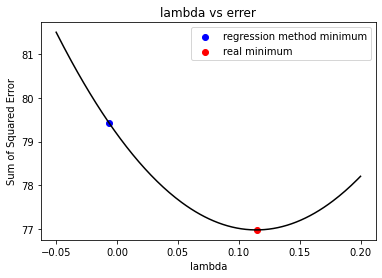

In [89]:
plt.plot(lamb_list,err_list,  color='black')
plt.title('lambda vs errer')
plt.xlabel('lambda')
plt.ylabel('Sum of Squared Error')
plt.scatter(-0.00672824, tem_err,label = 'regression method minimum', color= 'blue')
plt.scatter(lamb_list[real_min_idx], real_min,label = 'real minimum', color= 'red')
plt.legend(loc = 'upper right')
plt.savefig('lambda_errer(regression).png')
plt.show()

In [88]:
real_min_idx

131